In [223]:
import numpy as np
import pandas as pd

print ('Loading...')

targetId = 1490281

data = pd.read_csv("./data/maille_Kado.csv")

user = data.sort_values(by=['CLI_ID'], ascending=[True])
user = user.drop_duplicates(subset=['CLI_ID'])
newLen = len(user)
userIdList = [i+1 for i in range(newLen)]
users = np.unique(userIdList)
user['USER_ID'] = userIdList
user = user[['USER_ID', 'CLI_ID']]

Loading...


In [224]:
import json
from urllib.request import urlopen, Request

requestCustomers = Request('https://romainpiot.fr/bigdata/customers.json', headers={'User-Agent': 'Mozilla/5.0'})

customersData = json.loads(urlopen(requestCustomers).read())

In [225]:
averagePrice = []
numberItems = []


def getItemPrice(cli_id):
    if (cli_id in customersData):
        tmp = customersData[cli_id]["order_price_average"]
        return(tmp)
    return(False)


def getnumberItems(cli_id):
    if (cli_id in customersData):
        tmp = customersData[cli_id]["nb_products"]
        return(tmp)
    return(False)

for userId in user['CLI_ID']:
    price = getItemPrice(str(userId))
    if price != False:
        averagePriceTmp = []
        averagePriceTmp.append(float(price))
        averagePriceTmp.append(userId)
        averagePrice.append(averagePriceTmp)
    else:
        break
    items = getnumberItems(str(userId))
    if items != False:
        numberItemsTmp = []
        numberItemsTmp.append(float(items))
        numberItemsTmp.append(userId)
        numberItems.append(numberItemsTmp)

In [226]:
X = np.array(averagePrice)
Y = np.array(numberItems)
print(X)

[[1.34000000e+01 1.49028100e+06]
 [5.45000000e+00 2.02000410e+07]
 [2.98200000e+01 9.08223280e+07]
 [1.30300000e+01 3.62128564e+08]
 [2.43200000e+01 3.79731029e+08]
 [1.43400000e+01 3.79770712e+08]
 [2.28500000e+01 3.82981257e+08]
 [1.68900000e+01 3.87432999e+08]
 [7.00000000e+00 3.87473292e+08]
 [6.95000000e+00 3.96251217e+08]
 [3.88500000e+01 4.01255773e+08]
 [1.29000000e+01 4.05958556e+08]
 [9.94000000e+00 6.04168256e+08]
 [1.19400000e+01 7.69916424e+08]
 [5.61000000e+00 8.00063780e+08]
 [1.00400000e+01 8.00104081e+08]
 [6.61000000e+00 8.00216083e+08]
 [2.70800000e+01 8.00237724e+08]
 [9.31000000e+00 8.00239150e+08]
 [5.95000000e+00 8.00239942e+08]
 [1.55800000e+01 8.00246494e+08]
 [5.95000000e+00 8.00248985e+08]
 [7.65000000e+00 8.00250503e+08]
 [9.06000000e+00 8.00265551e+08]
 [1.68900000e+01 8.00275104e+08]
 [1.17300000e+01 8.00286276e+08]
 [9.60000000e+00 8.00289022e+08]
 [8.15000000e+00 8.00299724e+08]
 [1.22600000e+01 8.00313301e+08]
 [5.45000000e+00 8.00425905e+08]
 [2.232000

In [227]:
import numpy as np
from math import *

def findMax(list):
    max = 0
    for i in list:
        if max < ceil(i[0]):
            max = ceil(i[0])
    return max

def createSparseMatrice(test, max):
       newTab = np.zeros([len(test), max])
       for i in  range(len(test)):
            newTab[i,ceil(test[i][0] - 1)] = 1
       return newTab


maxPrice = findMax(X)
maxItems = findMax(Y)
print(maxPrice)
print(Y)
sparcePrice = createSparseMatrice(X, maxPrice)
sparceItems = createSparseMatrice(Y, maxItems)


39
[[2.00000000e+00 1.49028100e+06]
 [1.00000000e+00 2.02000410e+07]
 [5.00000000e+00 9.08223280e+07]
 [6.00000000e+00 3.62128564e+08]
 [8.00000000e+00 3.79731029e+08]
 [6.00000000e+00 3.79770712e+08]
 [2.00000000e+00 3.82981257e+08]
 [2.00000000e+00 3.87432999e+08]
 [1.00000000e+00 3.87473292e+08]
 [1.00000000e+00 3.96251217e+08]
 [3.00000000e+00 4.01255773e+08]
 [2.00000000e+00 4.05958556e+08]
 [1.00000000e+00 6.04168256e+08]
 [1.00000000e+00 7.69916424e+08]
 [6.00000000e+00 8.00063780e+08]
 [7.00000000e+00 8.00104081e+08]
 [3.00000000e+00 8.00216083e+08]
 [1.00000000e+01 8.00237724e+08]
 [4.00000000e+00 8.00239150e+08]
 [1.00000000e+00 8.00239942e+08]
 [1.40000000e+01 8.00246494e+08]
 [1.00000000e+00 8.00248985e+08]
 [5.00000000e+00 8.00250503e+08]
 [3.00000000e+00 8.00265551e+08]
 [6.00000000e+00 8.00275104e+08]
 [1.10000000e+01 8.00286276e+08]
 [3.00000000e+00 8.00289022e+08]
 [5.00000000e+00 8.00299724e+08]
 [5.00000000e+00 8.00313301e+08]
 [1.00000000e+00 8.00425905e+08]
 [4.000

In [228]:
df_sparseMatrixPrice = pd.DataFrame(sparcePrice, index = [i+1 for i in range(len(user))], columns= [i+1 for i in range(maxPrice)] )
df_sparseMatrixPrice

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
df_sparseMatrixItems = pd.DataFrame(sparceItems, index = [i+1 for i in range(len(user))], columns= [i+1 for i in range(maxItems)] )
df_sparseMatrixItems

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
from sklearn.cluster import KMeans

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse

sseX = calculate_WSS(X, 10)
sseY = calculate_WSS(Y, 10)

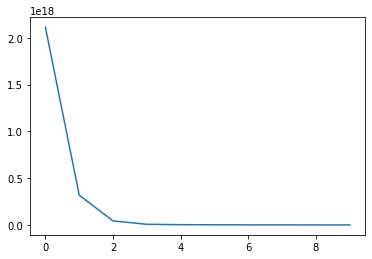

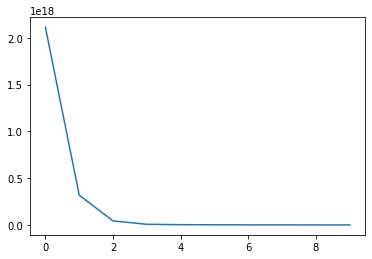

In [231]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(sseX)
plt.show()

plt.plot(sseY)
plt.show()

In [232]:
# def kmeans(X, k):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
#     clusters = kmeans.predict(X)
#     plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
#     plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
#     return(clusters)

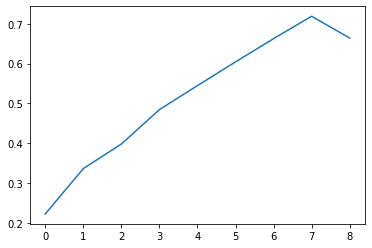

In [233]:
from sklearn.metrics import silhouette_score

silPrice = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_sparseMatrixPrice)
  labels = kmeans.labels_
  silPrice.append(silhouette_score(df_sparseMatrixPrice, labels, metric = 'euclidean'))
plt.plot(silPrice)
plt.show()

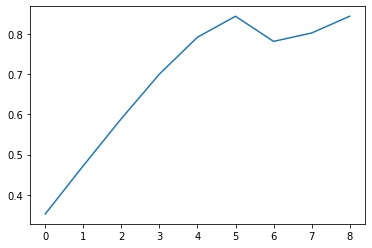

In [234]:
silItems = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_sparseMatrixItems)
  labels = kmeans.labels_
  silItems.append(silhouette_score(df_sparseMatrixItems, labels, metric = 'euclidean'))
plt.plot(silItems)
plt.show()

In [235]:
kmeansPrice = KMeans(n_clusters=7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clustersPrice = kmeansPrice.fit_predict(df_sparseMatrixPrice)
kmeansItems = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clustersItems = kmeansItems.fit_predict(df_sparseMatrixItems)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
userId,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
cli_id,1490281,20200041,90822328,362128564,379731029,379770712,382981257,387432999,387473292,396251217,...,800250503,800265551,800275104,800286276,800289022,800299724,800313301,800425905,800450442,800483443
Cluster,6,1,0,6,0,0,0,5,4,4,...,0,2,5,0,2,0,3,1,0,1


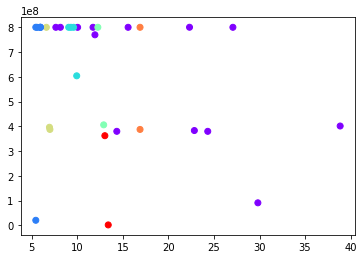

In [236]:
users = np.array([i+1 for i in range(len(user))])
clid = np.array(user['CLI_ID'][:len(user)])

users_clusterPrice = pd.DataFrame(np.concatenate((users.reshape(-1,1),clid.reshape(-1,1), clustersPrice.reshape(-1,1)), axis = 1), columns = ['userId', 'cli_id', 'Cluster'])

plt.scatter(X[:,0],X[:,1], c=kmeansPrice.labels_, cmap='rainbow')
users_clusterPrice.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
userId,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
cli_id,1490281,20200041,90822328,362128564,379731029,379770712,382981257,387432999,387473292,396251217,...,800250503,800265551,800275104,800286276,800289022,800299724,800313301,800425905,800450442,800483443
Cluster,2,1,3,0,0,0,2,2,1,1,...,3,4,0,0,4,3,3,1,0,1


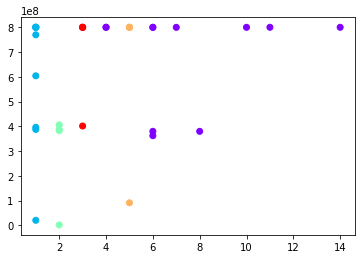

In [237]:
users = np.array([i+1 for i in range(len(user))])
clid = np.array(user['CLI_ID'][:len(user)])

users_clusterItems = pd.DataFrame(np.concatenate((users.reshape(-1,1),clid.reshape(-1,1), clustersItems.reshape(-1,1)), axis = 1), columns = ['userId', 'cli_id', 'Cluster'])
plt.scatter(Y[:,0],Y[:,1], c=kmeansItems.labels_, cmap='rainbow')
users_clusterItems.T

In [238]:
def parseData(cli_id):
       tmpuser= user[['CLI_ID']]
       for i in range(len(tmpuser)):
              if (user.iloc[i]['CLI_ID']) == cli_id:
                     return (i)
       return "error"


cid = parseData(targetId)
if cid == "error":
       print(f"Could not find client" )
else:
       tmp = clustersPrice[cid]
       print (tmp)

6


In [239]:
sameClusterUser = []
for i in range(len(clustersPrice)):
       if clustersPrice[i] == tmp:
              sameClusterUser.append(i)
print(sameClusterUser)

[0, 3]


In [243]:
newData = []

for i in range(len(user)):
       for j in sameClusterUser:
              if data.iloc[i]['CLI_ID'] == user.iloc[j]['CLI_ID']:
                  if data.iloc[i]['CLI_ID'] != targetId:
                     newData.append(data.iloc[i])


dfNewData = pd.DataFrame(newData)
dfNewData

,Unnamed: 0,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
8,131,33998886,4,9.90,maquillage,maq-yeux-stylos,maq-yeux-classique,porte-mine-noir-01-cn3-0-3g,362128564
9,132,35907635,11,9.90,maquillage,maq-yeux-stylos,maq-yeux-classique,porte-mine-noir-01-cn3-0-3g,362128564
10,133,33169206,1,5.45,soins-du-visage,vis-cjour-jeunes-specifique,vis-jeune-et-levre,cr-jour-px-mix-hydra-veg-p50ml,362128564
11,134,33169206,1,5.45,soins-du-visage,vis-cjour-jeunes-specifique,vis-jeune-et-levre,cr-jour-px-mix-hydra-veg-p50ml,362128564
12,135,33169206,1,9.95,soins-du-visage,vis-trait-aaar,vis-aaar-hors-demaqlotion,rete-roll-on-rajeunissant-sv15,362128564
13,136,34743383,7,11.50,soins-du-visage,vis-trait-aaar,vis-aaar-hors-demaqlotion,roll-on-regard-elixir7-9-t15ml,362128564


In [244]:
dfNewData.to_csv("./data/price_Kado.csv")

In [258]:
import random

kdoData = pd.read_csv("./data/price_Kado.csv")

rand = random.randint(0, len(kdoData)-1)

# kdoData = kdoData[['LIBELLE']]
gift = kdoData.iloc[rand]['LIBELLE']
based = kdoData.iloc[rand]['CLI_ID']
print(f"Client", targetId, "will be gifted", gift, "based on him belonging to the sames meshes, price average, number of items bought clusters than ",based)

Client 1490281 will be gifted cr-jour-px-mix-hydra-veg-p50ml based on him belonging to the sames meshes, price average, number of items bought clusters than  362128564
